# ADAPTIVE LINEAR NEURONS AND THE CONVERGENCE OF LEARNING

- Single-layer neural network (NN)- Adaptive linear neuron (Adaline)
- The Adaline algorithm is particularly interesting because it illustrates the key concept of defining and minimizing continuous loss function.
- The Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights.Incontrast,the perceptron compares the true class labels to the predicted class labels.

![image](./Images/02_09.png)

![image](https://miro.medium.com/v2/resize:fit:1250/1*kIDJpgOa6p0p9k2vbFeurQ.png)

![image](https://miro.medium.com/v2/resize:fit:569/1*gZ9IpHVsiWOYzUks98pd0Q.png)

![image](./Images/02_10.png)

# IMPLEMENTING ADALINE IN PYTHON

In [3]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


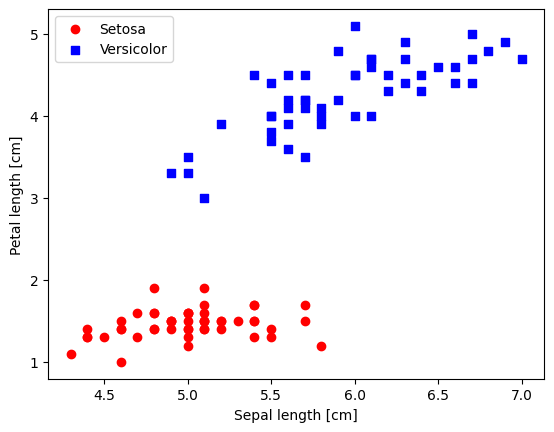

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [5]:
import numpy as np
class AdalineGD:
    """
    Adaptive Linear Neuron Classifier.
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    losses_ : list
        mean squared loss function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors)/X.shape[0] # matrix vector multiplication
            self.b_ += self.eta * 2.0 * errors.mean() # gradient based on whole training dataset
            loss = (errors**2).mean()
            self.losses_.append(loss)
        
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    def activation(self, X):
        """Compute linear activation"""
        return X
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    

#### Now plot the loss against the number of epachs for the two different learning rates:

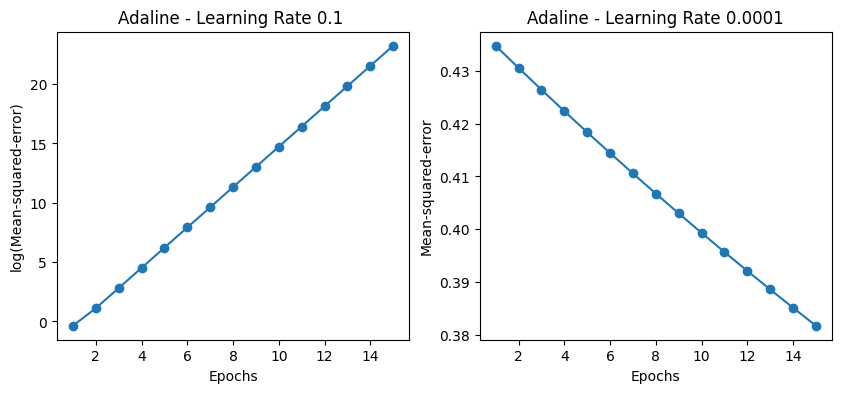

In [6]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1 = AdalineGD(n_iter=15,eta=0.1).fit(X,y)
ax[0].plot(range(1,len(ada1.losses_)+1),np.log10(ada1.losses_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean-squared-error)')
ax[0].set_title('Adaline - Learning Rate 0.1 ')
ada2 = AdalineGD(n_iter=15,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.losses_)+1),ada2.losses_,marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean-squared-error')
ax[1].set_title('Adaline - Learning Rate 0.0001')
plt.show()